In [1]:
%matplotlib inline
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
#import seaborn as sns
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from matplotlib.pylab import rcParams
%matplotlib inline
import matplotlib.mlab as mlab

## Load the feature data downloaded from Google Trend

In [2]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
data=pd.read_csv('/Users/Helen/Documents/Data/query1/features.csv',parse_dates=['week'],index_col=0,date_parser=dateparse)

## 5-fold cross validation/Train & test period 

In [3]:
# create 5 Elastic net models by using different size of training data
train1, test1 = data[0:396], data[396:448] # train: 2004-2011 test: 2011-2012 Elastic net1, OLS1
train2, test2 = data[0:448], data[448:500] # train: 2004-2012 test: 2012-2013 Elastic net2, OLS2
train3, test3 = data[0:500], data[500:552] # train: 2004-2013 test: 2013-2014 Elastic net3, OLS3
train4, test4= data[0:552], data[552:604] # train: 2004-2014 test: 2014-2015 Elastic net4, OLS4
train5, test5 = data[0:604], data[604:657] # train: 2004-2015 test: 2015-2016 Elastic net5, OLS5

In [4]:
L1=test1.index
L2=test2.index
L3=test3.index
L4=test4.index
L5=test5.index

In [5]:
#data[selected].corr(method='pearson')

In [6]:
features=['hayfever','hay fever','symptoms of hayfever','hayfever remedies','hayfever injection','hayfever cure', 'hayfever treatment',
          'hayfever uk','hayfever relief','hay fever symptoms',
          'hayfever symptoms','hayfever tablets',
          'pollen','hayfever eyes','hayfever eye', 'pollen count','hayfever spray',
          'hayfever count','hayfever medicine',
          'hayfever boots','what is hayfever',
          'hayfever medication','pregnant hayfever','hayfever pregnancy','hayfever in pregnancy',
          'hayfever cures','cures for hayfever',
          'hayfever eye drops','best hayfever tablets','hayfever children',
          'cure hayfever', 'hayfever remedy',
           'itchy eyes','sneezing','red eyes','blocked sinuses','runny nose','shortness of breath',
            'hayfever pollen count',
           'boots hayfever','honey hayfever','bbc pollen count','uk pollen count',
            'remedies for hayfever']
queries=features[0:]
len(set(queries))

44

## Drop unrelevant queries

In [7]:
from scipy.stats.stats import pearsonr  
selected=[]
for x in features:
    r=pearsonr(data[x], data['hayfever_rate'])
    if(r[0])>=(0.65):
        selected.append(x)
len(set(selected))

38

In [8]:
d=data[selected].corrwith(data['hayfever_rate'])
d.sort_values()

symptoms of hayfever     0.676460
cures for hayfever       0.688148
what is hayfever         0.694468
hayfever medication      0.703354
hayfever medicine        0.704059
hayfever spray           0.713395
hayfever relief          0.713993
hayfever cures           0.714511
best hayfever tablets    0.727504
honey hayfever           0.735458
hayfever in pregnancy    0.739914
hayfever eye drops       0.740467
pregnant hayfever        0.746410
boots hayfever           0.747238
hayfever children        0.747379
hayfever boots           0.747445
remedies for hayfever    0.749547
hayfever pollen count    0.750396
hay fever symptoms       0.761115
hayfever eye             0.762404
hayfever count           0.771419
bbc pollen count         0.778034
hayfever eyes            0.783072
hayfever remedy          0.783403
cure hayfever            0.784192
hayfever cure            0.790803
hayfever uk              0.800932
uk pollen count          0.805295
hayfever treatment       0.807125
hayfever pregn

In [9]:
# elastic net1
y_train1 = train1['hayfever_rate'].values
x_train1 = train1[selected]
x_test1 = test1[selected]
y_test1 = test1['hayfever_rate'].values
# elastic net2
y_train2 = train2['hayfever_rate'].values
x_train2 = train2[selected]
x_test2 = test2[selected]
y_test2 = test2['hayfever_rate'].values
# elastic net3
y_train3 = train3['hayfever_rate'].values
x_train3 = train3[selected]
x_test3 = test3[selected]
y_test3 = test3['hayfever_rate'].values
# elastic net4
y_train4 = train4['hayfever_rate'].values
x_train4 = train4[selected]
x_test4 = test4[selected]
y_test4 = test4['hayfever_rate'].values
# elastic net5
y_train5 = train5['hayfever_rate'].values
x_train5 = train5[selected]
x_test5 = test5[selected]
y_test5 = test5['hayfever_rate'].values

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.metrics import mean_squared_error, make_scorer
parameters = {'alpha':range(0,300,10)}

enet= GridSearchCV(ElasticNet(fit_intercept= True,max_iter=20000,tol =0.000001,l1_ratio=0.5),param_grid=parameters,scoring=make_scorer(mean_squared_error))
enet.fit(X = x_train, y = y_train)
y_pred_enet = enet.best_estimator_.predict(x_valid)
enet.best_params_

# Elastic net1

In [10]:
from sklearn.linear_model import ElasticNet
enet1 = ElasticNet(alpha=253.42, l1_ratio=0.5,fit_intercept=True, max_iter=20000, tol=0.0000001) # train period 1
enet1 = enet1.fit(x_train1, y_train1)
y_pred_enet1 = enet1.predict(x_test1)
#enet.intercept_

## Query weight

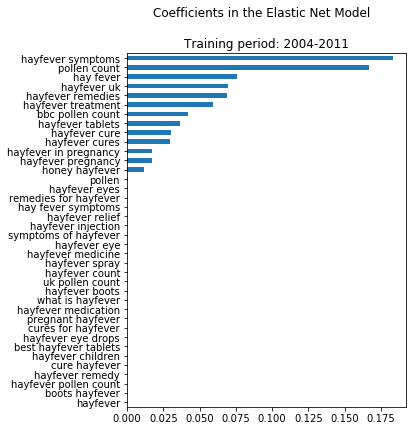

In [11]:
coef = pd.Series(enet1.coef_, index = x_train1.columns)
#imp_coef = pd.concat([coef.sort_values().head(10),coef.sort_values().tail(10)])
imp_coef = pd.concat([coef.sort_values()])
plt.rcParams['figure.figsize'] = (5.0, 6.5)
imp_coef.plot(kind = "barh")
plt.suptitle("Coefficients in the Elastic Net Model")
plt.title("Training period: 2004-2011")

In [12]:
df1 = pd.DataFrame(data=y_pred_enet1, index=L1,columns=["predicted rate"])
df1_ = pd.DataFrame(data=y_test1, index=L1,columns=["real hayfever rate"])

## RMSE, MAE, and Pearson corrleation

In [13]:
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.metrics import mean_absolute_error
from scipy.stats.stats import pearsonr   
MSE1 = mean_squared_error(y_test1, y_pred_enet1, sample_weight=None, multioutput='uniform_average')
RMSE1=np.sqrt(MSE1)
MAE1 = mean_absolute_error(y_test1, y_pred_enet1, sample_weight=None, multioutput='uniform_average')
print("RMSE %.4f" % RMSE1)
print("MAE %.4f" % MAE1)
r1=pearsonr(y_test1, y_pred_enet1)
print(r1)

RMSE 6.0953
MAE 5.1994
(0.96983954276321538, 2.5690771435506086e-32)


from sklearn.model_selection import cross_val_score
score = cross_val_score(enet,x_train,y_train,cv=5,scoring='mean_squared_error')
score.mean()

def rmse(predictions, targets):

    differences = predictions - targets                       #the DIFFERENCEs.

    differences_squared = differences ** 2                    #the SQUAREs of ^

    mean_of_differences_squared = differences_squared.mean()  #the MEAN of ^

    rmse_val = np.sqrt(mean_of_differences_squared)           #ROOT of ^

    return rmse_val     

def elastic(alpha):
    enet = ElasticNet(alpha=alpha, l1_ratio=0.5, fit_intercept=True,max_iter=20000, tol=0.0000001)
    y_pred_enet = enet.fit(x_train, y_train).predict(x_test)
    return y_pred_enet

### Optimal for RMSE

def find_optimal_for_all1(low, high, epsilon=1):
    print(high, low)
    y_pred_enet = elastic(low)
    print(low, rmse(y_pred_enet, y_test))
    if high - low < epsilon:
        y_pre = elastic(high)
        print(high, rmse(y_pre, y_test))
    else:

        mid = (high+low) / 2.0
        #enet1 = ElasticNet(alpha=mid-epsilon, l1_ratio=l1)
        y_pred_enet1 = elastic(mid-epsilon)
        left = rmse(y_pred_enet1, y_test)
        #enet2 = ElasticNet(alpha=mid+epsilon, l1_ratio=l1)
        y_pred_enet2 = elastic(mid+epsilon)
        right = rmse(y_pred_enet2, y_test)
        if left < right:
            return find_optimal_for_all1(low, mid, epsilon)
        else:
            return find_optimal_for_all1(mid, high, epsilon) 

#find_optimal_for_all1(1,500)

# OLS regression1

In [14]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)
model1 = model1.fit(x_train1, y_train1)
y_pred_base1 = model1.predict(x_test1)
#model1.intercept_

## Query weight

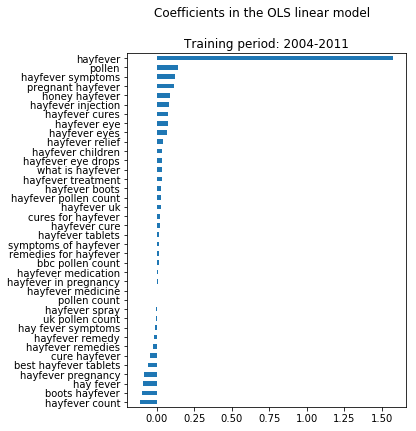

In [15]:
coef = pd.Series(model1.coef_, index = x_train1.columns)
#imp_coef = pd.concat([coef.sort_values().head(10),coef.sort_values().tail(10)])
imp_coef = pd.concat([coef.sort_values()])
plt.rcParams['figure.figsize'] = (5.0, 6.5)
imp_coef.plot(kind = "barh")
plt.suptitle("Coefficients in the OLS linear model")
plt.title("Training period: 2004-2011")

## RMSE, MAE, and Pearson corrleation

In [16]:
dfa = pd.DataFrame(data=y_pred_base1, index=L1,columns=["predicted rate"])
dfa_ = pd.DataFrame(data=y_test1, index=L1,columns=["real hayfever rate"])
MSE1 = mean_squared_error(y_test1, y_pred_base1, sample_weight=None, multioutput='uniform_average')
RMSE1=np.sqrt(MSE1)
MAE1 = mean_absolute_error(y_test1, y_pred_base1, sample_weight=None, multioutput='uniform_average')
print("RMSE %.4f" % RMSE1)
print("MAE %.4f" % MAE1)
r1=pearsonr(y_test1, y_pred_base1)
print(r1)

RMSE 8.6143
MAE 5.3091
(0.97599152802675615, 9.2079434406996402e-35)


# Compare perforamce of Elastic net1 and OLS1

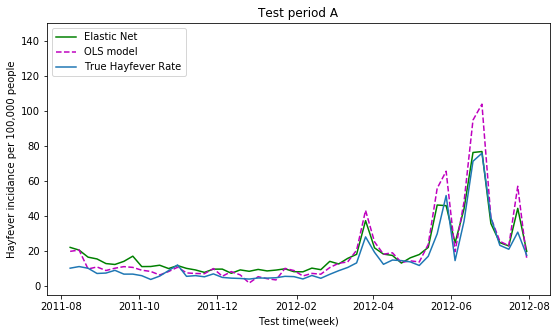

In [17]:
plt.figure(figsize=(9,5))
plt.ylim((-5, 150))
plt.ylabel("Hayfever incidance per 100,000 people")
plt.xlabel("Test time(week)")
plt.plot(df1, label='Elastic Net', color='g')
plt.plot(dfa, label='Least squares linear model',color='m',linestyle='--')
plt.plot(df1_, label='True Hayfever Rate')
plt.legend(['Elastic Net', 'OLS model', 'True Hayfever Rate'], loc='upper left')
plt.title('Test period A')
pyplot.show()

# Elastic net2

In [18]:
enet2 = ElasticNet(alpha=124.78, l1_ratio=0.5,fit_intercept=True, max_iter=20000, tol=0.0000001) # train period 2
enet2 = enet2.fit(x_train2, y_train2)
y_pred_enet2 = enet2.predict(x_test2)

## Query weight 

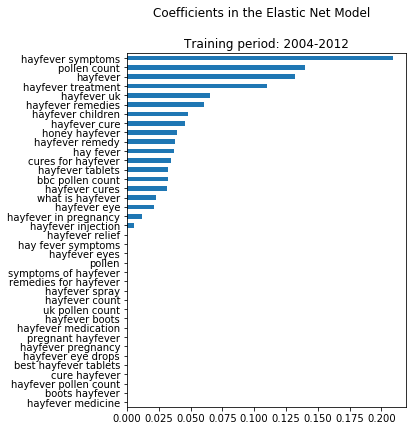

In [19]:
coef = pd.Series(enet2.coef_, index = x_train2.columns)
#imp_coef = pd.concat([coef.sort_values().head(10),coef.sort_values().tail(10)])
imp_coef = pd.concat([coef.sort_values()])
plt.rcParams['figure.figsize'] = (5.0, 6.5)
imp_coef.plot(kind = "barh")
plt.suptitle("Coefficients in the Elastic Net Model")
plt.title("Training period: 2004-2012")

In [20]:
df2 = pd.DataFrame(data=y_pred_enet2, index=L2,columns=["predicted rate"])
df2_ = pd.DataFrame(data=y_test2, index=L2,columns=["real hayfever rate"])

## RMSE, MAE, and Pearson corrleation

In [21]:
MSE2 = mean_squared_error(y_test2, y_pred_enet2, sample_weight=None, multioutput='uniform_average')
RMSE2=np.sqrt(MSE2)
MAE2 = mean_absolute_error(y_test2, y_pred_enet2, sample_weight=None, multioutput='uniform_average')
print("RMSE %.4f" % RMSE2)
print("MAE %.4f" % MAE2)
r2=pearsonr(y_test2, y_pred_enet2)
print(r2)

RMSE 4.0479
MAE 3.1015
(0.98960482991754772, 8.802506714447978e-44)


# OLS regression2

In [22]:
model2 = LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)
model2 = model2.fit(x_train2, y_train2)
y_pred_base2 = model2.predict(x_test2)
#model1.intercept_

## Query weight 

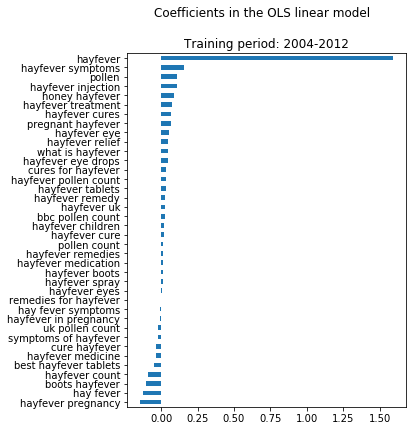

In [23]:
coef = pd.Series(model2.coef_, index = x_train2.columns)
#imp_coef = pd.concat([coef.sort_values().head(10),coef.sort_values().tail(10)])
imp_coef = pd.concat([coef.sort_values()])
plt.rcParams['figure.figsize'] = (5.0, 6.5)
imp_coef.plot(kind = "barh")
plt.suptitle("Coefficients in the OLS linear model")
plt.title("Training period: 2004-2012")

## RMSE, MAE, and Pearson corrleation

In [24]:
dfb = pd.DataFrame(data=y_pred_base2, index=L2,columns=["predicted rate"])
dfb_ = pd.DataFrame(data=y_test2, index=L2,columns=["real hayfever rate"])
MSE2 = mean_squared_error(y_test2, y_pred_base2, sample_weight=None, multioutput='uniform_average')
RMSE2=np.sqrt(MSE2)
MAE2 = mean_absolute_error(y_test2, y_pred_base2, sample_weight=None, multioutput='uniform_average')
print("RMSE %.4f" % RMSE2)
print("MAE %.4f" % MAE2)
r2=pearsonr(y_test2, y_pred_base2)
print(r2)

RMSE 12.6036
MAE 6.5024
(0.98837594196498757, 1.4176561707792542e-42)


# Compare perforamce of Elastic net2 and OLS2

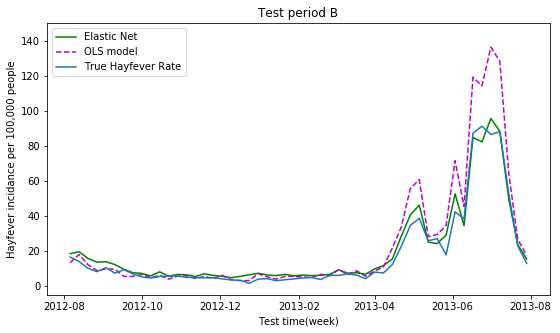

In [25]:
plt.figure(figsize=(9,5))
plt.ylim((-5, 150))
plt.ylabel("Hayfever incidance per 100,000 people")
plt.xlabel("Test time(week)")
plt.plot(df2, label='Elastic Net', color='g')
plt.plot(dfb, label='Least squares linear model',color='m',linestyle='--')
plt.plot(df2_, label='True Hayfever Rate')
plt.title('Test period B')
plt.legend(['Elastic Net', 'OLS model', 'True Hayfever Rate'], loc='upper left')
pyplot.show()

# Elastic net3

In [26]:
enet3 = ElasticNet(alpha=87.74, l1_ratio=0.5,fit_intercept=True, max_iter=20000, tol=0.0000001) #train period 3
enet3 = enet3.fit(x_train3, y_train3)
y_pred_enet3 = enet3.predict(x_test3)

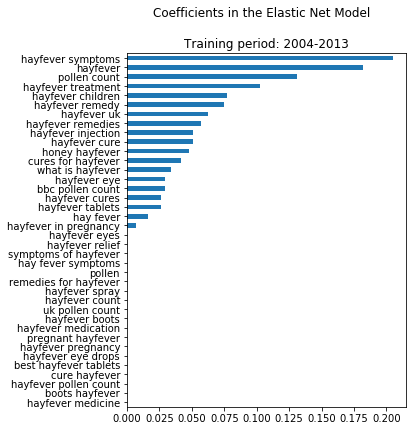

In [27]:
coef = pd.Series(enet3.coef_, index = x_train3.columns)
#imp_coef = pd.concat([coef.sort_values().head(10),coef.sort_values().tail(10)])
imp_coef = pd.concat([coef.sort_values()])
plt.rcParams['figure.figsize'] = (5.0, 6.5)
imp_coef.plot(kind = "barh")
plt.suptitle("Coefficients in the Elastic Net Model")
plt.title("Training period: 2004-2013")

In [28]:
df3 = pd.DataFrame(data=y_pred_enet3, index=L3,columns=["predicted rate"])
df3_ = pd.DataFrame(data=y_test3, index=L3,columns=["real hayfever rate"])

## RMSE, MAE, and Pearson corrleation

In [29]:
MSE3 = mean_squared_error(y_test3, y_pred_enet3, sample_weight=None, multioutput='uniform_average')
RMSE3=np.sqrt(MSE3)
MAE3 = mean_absolute_error(y_test3, y_pred_enet3, sample_weight=None, multioutput='uniform_average')
print("RMSE %.4f" % RMSE3)
print("MAE %.4f" % MAE3)
r3=pearsonr(y_test3, y_pred_enet3)
print(r3)

RMSE 3.8235
MAE 2.7065
(0.98795653908537995, 3.4221267141834357e-42)


# OLS regression3

In [30]:
model3 = LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)
model3 = model3.fit(x_train3, y_train3)
y_pred_base3 = model3.predict(x_test3)
#model1.intercept_

## RMSE, MAE, and Pearson corrleation

In [31]:
dfc = pd.DataFrame(data=y_pred_base3, index=L3,columns=["predicted rate"])
dfc_ = pd.DataFrame(data=y_test3, index=L3,columns=["real hayfever rate"])
MSE3 = mean_squared_error(y_test3, y_pred_base3, sample_weight=None, multioutput='uniform_average')
RMSE3=np.sqrt(MSE3)
MAE3 = mean_absolute_error(y_test3, y_pred_base3, sample_weight=None, multioutput='uniform_average')
print("RMSE %.4f" % RMSE3)
print("MAE %.4f" % MAE3)
r3=pearsonr(y_test3, y_pred_base3)
print(r3)

RMSE 7.0177
MAE 4.1046
(0.99046001218767721, 1.0394825236088539e-44)


# Compare perforamce of Elastic net3 and OLS3

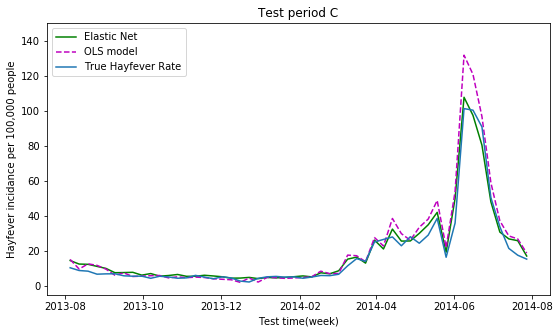

In [32]:
plt.figure(figsize=(9,5))
plt.ylim((-5, 150))
plt.ylabel("Hayfever incidance per 100,000 people")
plt.xlabel("Test time(week)")
plt.plot(df3, label='Elastic Net', color='g')
plt.plot(dfc, label='Least squares linear model',color='m',linestyle='--')
plt.plot(df3_, label='True Hayfever Rate')
plt.title('Test period C')
plt.legend(['Elastic Net', 'OLS model', 'True Hayfever Rate'], loc='upper left')
pyplot.show()

# Elastic net4

In [33]:
enet4 = ElasticNet(alpha=154.01, l1_ratio=0.5,fit_intercept=True, max_iter=20000, tol=0.0000001) # train period 4
enet4 = enet4.fit(x_train4, y_train4)
y_pred_enet4 = enet4.predict(x_test4)

## Query weight 

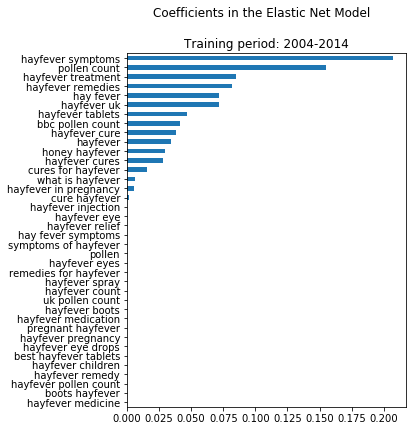

In [34]:
coef = pd.Series(enet4.coef_, index = x_train4.columns)
#imp_coef = pd.concat([coef.sort_values().head(10),coef.sort_values().tail(10)])
imp_coef = pd.concat([coef.sort_values()])
plt.rcParams['figure.figsize'] = (5.0, 6.5)
imp_coef.plot(kind = "barh")
plt.suptitle("Coefficients in the Elastic Net Model")
plt.title("Training period: 2004-2014")

In [35]:
df4 = pd.DataFrame(data=y_pred_enet4, index=L4,columns=["predicted rate"])
df4_ = pd.DataFrame(data=y_test4, index=L4,columns=["real hayfever rate"])

## RMSE, MAE, and Pearson corrleation

In [36]:
MSE4 = mean_squared_error(y_test4, y_pred_enet4, sample_weight=None, multioutput='uniform_average')
RMSE4=np.sqrt(MSE4)
MAE4 = mean_absolute_error(y_test4, y_pred_enet4, sample_weight=None, multioutput='uniform_average')
print("RMSE %.4f" % RMSE4)
print("MAE %.4f" % MAE4)
r4=pearsonr(y_test4, y_pred_enet4)
print(r4)

RMSE 3.7868
MAE 2.8856
(0.98932378664962095, 1.7093548257078701e-43)


# OLS Regression4

In [37]:
model4 = LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)
model4 = model4.fit(x_train4, y_train4)
y_pred_base4 = model4.predict(x_test4)
#model1.intercept_

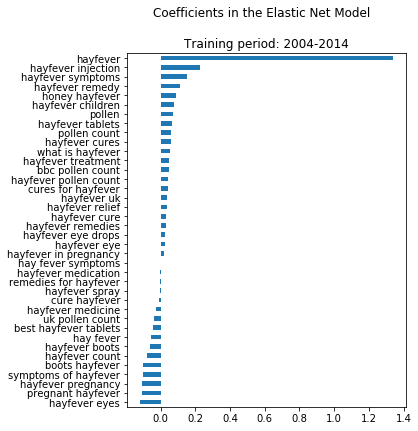

In [38]:
coef = pd.Series(model4.coef_, index = x_train4.columns)
#imp_coef = pd.concat([coef.sort_values().head(10),coef.sort_values().tail(10)])
imp_coef = pd.concat([coef.sort_values()])
plt.rcParams['figure.figsize'] = (5.0, 6.5)
imp_coef.plot(kind = "barh")
plt.suptitle("Coefficients in the Elastic Net Model")
plt.title("Training period: 2004-2014")

## RMSE, MAE, and Pearson corrleation

In [39]:
dfd = pd.DataFrame(data=y_pred_base4, index=L4,columns=["predicted rate"])
dfd_ = pd.DataFrame(data=y_test4, index=L4,columns=["real hayfever rate"])
MSE4 = mean_squared_error(y_test4, y_pred_base4, sample_weight=None, multioutput='uniform_average')
RMSE4=np.sqrt(MSE4)
MAE4 = mean_absolute_error(y_test4, y_pred_base4, sample_weight=None, multioutput='uniform_average')
print("RMSE %.4f" % RMSE4)
print("MAE %.4f" % MAE4)
r4=pearsonr(y_test4, y_pred_base4)
print(r4)

RMSE 9.0794
MAE 4.7698
(0.99208223916660243, 1.0030980304350689e-46)


# Compare perforamce of Elastic net4 and OLS4

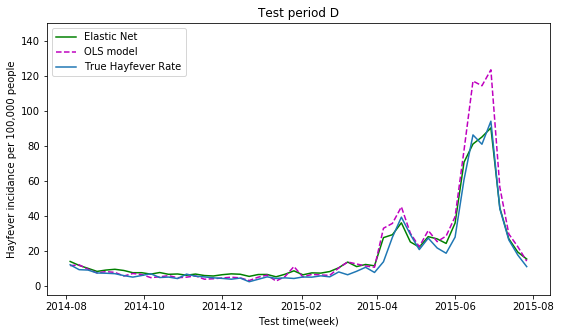

In [40]:
plt.figure(figsize=(9,5))
plt.ylim((-5, 150))
plt.ylabel("Hayfever incidance per 100,000 people")
plt.xlabel("Test time(week)")
plt.plot(df4, label='Elastic Net', color='g')
plt.plot(dfd, label='Least squares linear model',color='m',linestyle='--')
plt.plot(df4_, label='True Hayfever Rate')
plt.title('Test period D')
plt.legend(['Elastic Net', 'OLS model', 'True Hayfever Rate'], loc='upper left')
pyplot.show()

# Elastic net5

In [41]:
enet5 = ElasticNet(alpha=220.28, l1_ratio=0.5,fit_intercept=True, max_iter=20000, tol=0.0000001) # train period 5
enet5 = enet5.fit(x_train5, y_train5)
y_pred_enet5 = enet5.predict(x_test5)

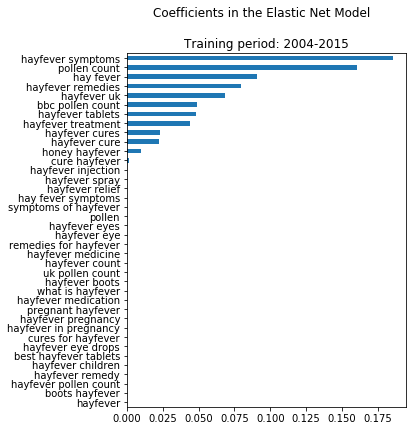

In [42]:
coef = pd.Series(enet5.coef_, index = x_train5.columns)
#imp_coef = pd.concat([coef.sort_values().head(10),coef.sort_values().tail(10)])
imp_coef = pd.concat([coef.sort_values()])
plt.rcParams['figure.figsize'] = (5.0, 6.5)
imp_coef.plot(kind = "barh")
plt.suptitle("Coefficients in the Elastic Net Model")
plt.title("Training period: 2004-2015")

## RMSE, MAE, and Pearson corrleation

In [43]:
df5 = pd.DataFrame(data=y_pred_enet5, index=L5,columns=["predicted rate"])
MSE5 = mean_squared_error(y_test5, y_pred_enet5, sample_weight=None, multioutput='uniform_average')
RMSE5=np.sqrt(MSE5)
MAE5 = mean_absolute_error(y_test5, y_pred_enet5, sample_weight=None, multioutput='uniform_average')
print("RMSE %.4f" % RMSE5)
print("MAE %.4f" % MAE5)
r5=pearsonr(y_test5, y_pred_enet5)
print(r5)

RMSE 4.6083
MAE 3.7457
(0.97965410006378562, 1.5329097363901667e-36)


# OLS regression5

In [44]:
model5 = LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)
model5 = model5.fit(x_train5, y_train5)
y_pred_base5 = model5.predict(x_test5)
#model1.intercept_

## RMSE, MAE, and Pearson corrleation

In [45]:
dfe = pd.DataFrame(data=y_pred_base5, index=L5,columns=["predicted rate"])
dfe_ = pd.DataFrame(data=y_test5, index=L5,columns=["real hayfever rate"])
MSE5 = mean_squared_error(y_test5, y_pred_base5, sample_weight=None, multioutput='uniform_average')
RMSE5=np.sqrt(MSE5)
MAE5 = mean_absolute_error(y_test5, y_pred_base5, sample_weight=None, multioutput='uniform_average')
print("RMSE %.4f" % RMSE5)
print("MAE %.4f" % MAE5)
r5=pearsonr(y_test5, y_pred_base5)
print(r5)

RMSE 8.1946
MAE 4.5759
(0.98411621971116836, 3.3112382796737716e-39)


# Compare perforamce of Elastic net5 and OLS5

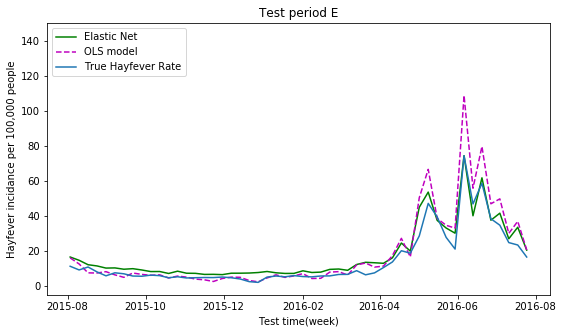

In [46]:
plt.figure(figsize=(9,5))
plt.ylim((-5, 150))
plt.ylabel("Hayfever incidance per 100,000 people")
plt.xlabel("Test time(week)")
plt.plot(df5, label='Elastic Net', color='g')
plt.plot(dfe, label='Least squares linear model',color='m',linestyle='--')
plt.plot(dfe_, label='True Hayfever Rate')
plt.legend(['Elastic Net', 'OLS model', 'True Hayfever Rate'], loc='upper left')
plt.title('Test period E')
pyplot.show()